<a href="https://colab.research.google.com/github/B4rb4r1s/ML-NN/blob/main/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

In [2]:
import math
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn import datasets

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Logistic Regression

## SKLearn

In [14]:
# iris = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
iris = datasets.load_iris()

### Iris table

In [15]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

### Code

In [32]:
X = iris.data[:, :2]    # we only take the first two features.
Y = iris.target

In [33]:
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

(627201,)


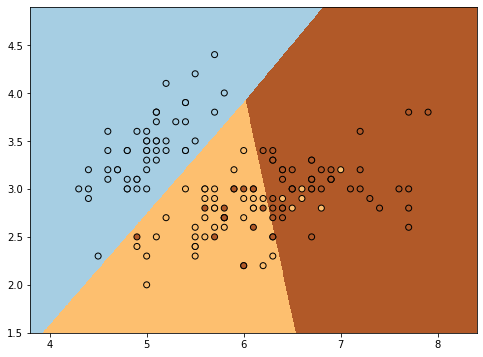

In [96]:
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
h = .005  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z.shape)
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')

# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.xticks(())
# plt.yticks(())

plt.show()

## Manualy

In [130]:
# species = iris['species'].to_numpy().reshape(-1,1)

# sepal_length = iris['sepal_length'].to_numpy().reshape(-1,1)
# sepal_width = iris['sepal_width'].to_numpy().reshape(-1,1)
# petal_length = iris['petal_length'].to_numpy().reshape(-1,1)
# petal_width = iris['petal_width'].to_numpy().reshape(-1,1)

X = iris.data[:, 2:]
Y = iris.target

In [216]:
class LogReg:
    def __init__(self, lr, gens):
        self.lr = lr
        self.gens = gens
        self.W = np.random.rand(2,1)*10
        self.b = 0.


    def w_corr(self, y_, y, X):
        return (y_ - y)*X[0] + (y_ - y)*X[1]
    def b_corr(self, y_, y):
        return y_ - y


    def MSE(self, y, y_):
        return -1 * y * np.log(y_) + (1-y) * np.log(1-y_)


    def predict(self, X):
        return 1 / ( 1 + np.exp(-1 * self.z_pog( X )))

    def z_pog(self, X):
        # sum = 0.
        # for i in range(self.W.shape[0]):
        #     sum += self.W[i] * X[i]
        # # print("sum", sum.shape)
        # return sum + self.b
        return np.dot(X, self.W) + self.b

    def train(self, X, Y):
        for f in range(self.gens):
            for i in range(150):
                y_ = self.predict( [X[i][0], X[i][1]] )

                self.W -= self.lr * self.w_corr(y_, Y[i], [X[i][0] , X[i][1]])
                self.b -= self.lr * self.b_corr(y_, Y[i])
                print(self.MSE(Y[i], y_))
        

In [219]:
model = LogReg(0.0001, 150)

In [220]:
model.train(X, Y)

[-7.33099103]
[-7.3306355]
[-6.81559791]
[-7.8447852]
[-7.32956895]
[-8.99190646]
[-7.3877182]
[-7.84317953]
[-7.32803462]
[-7.783515]
[-7.84204752]
[-8.3564723]
[-7.26772702]
[-5.72515644]
[-6.29726494]
[-7.95788696]
[-6.92826884]
[-7.38359819]
[-8.92729993]
[-7.89735951]
[-8.86760314]
[-7.95519903]
[-5.26821999]
[-9.04241827]
[-9.89524636]
[-8.35070465]
[-8.46752325]
[-7.83528932]
[-7.32049304]
[-8.34902766]
[-8.34860386]
[-7.95076438]
[-7.77479242]
[-7.31860301]
[-7.83255155]
[-6.28996078]
[-6.80345928]
[-7.25880488]
[-6.80281059]
[-7.83076208]
[-6.86047021]
[-6.86011496]
[-6.80145331]
[-8.57691535]
[-10.00275055]
[-7.37246504]
[-8.34213173]
[-7.31343413]
[-7.82714555]
[-7.312707]
[1.41351375e-11]
[3.73017173e-11]
[4.76751971e-12]
[5.48398216e-10]
[2.23032703e-11]
[4.19086987e-11]
[1.25812694e-11]
[2.39038073e-08]
[2.50579557e-11]
[8.65301831e-10]
[8.54574537e-09]
[1.74503745e-10]
[6.53066046e-10]
[1.41351375e-11]
[4.29072157e-09]
[6.61264377e-11]
[3.73017173e-11]
[3.90479871e-10]
[

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


Выходные данные были обрезаны до нескольких последних строк (5000).
[35.35050621]
[inf]
[27.43442811]
[inf]
[34.9450411]
[inf]
[31.1994663]
[32.2369909]
[33.55874674]
[30.64549069]
[31.66162675]
[32.71144888]
[33.27106467]
[inf]
[inf]
[30.11672736]
[34.9450411]
[30.11939759]
[inf]
[29.90592634]
[34.9450411]
[36.04365339]
[29.35156965]
[29.92555619]
[34.25189392]
[34.9450411]
[inf]
[inf]
[34.43421548]
[30.75538636]
[33.47870403]
[inf]
[34.65735903]
[33.40459606]
[29.41165161]
[33.15328163]
[34.65735903]
[31.71292005]
[31.25616165]
[36.04365339]
[35.35050621]
[32.30598377]
[30.70611531]
[31.96611595]
[33.47870403]
[31.17611894]
[-8.22300277]
[-8.22264696]
[-7.65160234]
[-8.7927151]
[-8.22157956]
[-10.16307814]
[-8.33550872]
[-8.79110861]
[-8.22004423]
[-8.67566638]
[-8.78997601]
[-9.36026449]
[-8.10395661]
[-6.39287234]
[-7.07711913]
[-9.01737013]
[-7.8758365]
[-8.33138522]
[-10.0426939]
[-8.90106337]
[-9.92722225]
[-9.01468088]
[-5.93501059]
[-10.26936035]
[-11.06646539]
[-9.35449328]
[

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


Выходные данные были обрезаны до нескольких последних строк (5000).
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[-12.8249371]
[-12.8245811]
[-11.96569795]
[-13.68239936]
[-12.8235131]
[-16.20341539]
[-13.22510544]
[-13.68079237]
[-12.82197711]
[-13.27769671]
[-13.67965937]
[-14.53764853]
[-12.41822223]
[-9.84290887]
[-11.10321786]
[-14.48235321]
[-12.76529293]
[-13.22097947]
[-15.79538925]
[-14.07839625]
[-15.39227709]
[-14.47966322]
[-9.38410323]
[-16.59733366]
[-17.10682258]
[-14.53187458]
[-15.33553277]
[-13.67289343]
[-12.81442518]
[-14.53019658]
[-14.52977259]
[-14.47522425]
[-13.26896478]
[-12.81253319]
[-13.67015344]
[-11.09589601]
[-11.95353809]
[-12.40928732]
[-11.9528881]
[-13.66836145]
[-12.3540142]
[-12.3536582]
[-11.95152811]
[

(938400, 1) (680, 1380)


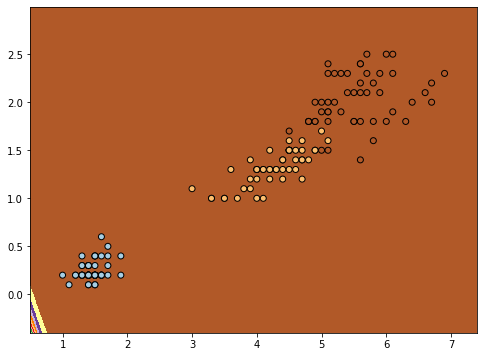

In [221]:
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
h = .005  # step size in the mesh

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z.shape, xx.shape)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')

# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.xticks(())
# plt.yticks(())

plt.show()

In [173]:
A = [[1, 2],
     [3, 4],
     [5, 6]]

np.dot(np.zeros((1,2)), [A[0][0], A[0][1]])
np.dot([A[0][0], A[0][1]], np.zeros((2,1)))

array([0.])